# The Rehub Loss


You are required to investigate a regularized update for SGD with the following regularization function:
$\phi(\mathbf{w}) = \sum_{j=1}^d h(w_j)$, where $h$ is a scalar function, $h: \mathbb{R} \to \mathbb{R}_+$ defined as,
$$
h(z) =
  \begin{cases}
    |z|      &  |z| \geq 1 \\
    a z^2  + c & \text{o.w.}
  \end{cases} ~ ,
$$
with $a,c\in\mathbb{R}_+$.

The core of the regularization, the function $h(z)$, must be continous. Its derivative, $h'(z)$, should be continous everywhere. We use SGD to approximately find the minimum of,
$\mathcal{L}(\mathbf{w}) + \lambda \phi(\mathbf{w})$. The empirical loss $\mathcal{L}(\mathbf{w})$ is a convex function. It was constructed such that $\mathcal{L}(\mathbf{0})=1$ and $\mathcal{L}(\mathbf{w}) \geq 0$.

1. Determine the values of $a$ and $c$. Using matplotlib, plot $h(z)$ and $h'(z)$ for $z\in[-3,3]$.


2. Let $\mathbf{w}^\star$ denote the optimal solution of the regularized problem,
   $\mathbf{w}^\star = \arg\min_{\mathbf{w}} \mathcal{L}(\mathbf{w}) + \lambda \phi(\mathbf{w})$. Use
   the value of the regularized loss at the optimum and the initial value at $\mathbf{0}$ to bound
   $\|\mathbf{w}^\star\|$ when $\lambda\geq2$.


3. Given your answer to (2), would $\phi(\mathbf{w})$ promote sparse or diverse solutions when
   $\lambda \geq 2$? Explain in 2-4 lines.


4. Derive a SGD update with $\phi(\mathbf{w})$ as the regularization function and $\lambda=3$. You can use
   the variables $\mathbf{w}_t$, $\mathbf{w}_{t+1}$, $\mathbf{g}_t$, and $\eta_t$ as used in class.

### Answer 1
To find continuity between the two parts of $h(z)$, I would first match the slope of the cuadratic part to that of the linear part at a boundary value, say when $z=1$. In other words:

$$
\frac{dh(z)}{dz} = 2az
$$

$$
\frac{dh(z)}{dz} = \frac{z}{|z|}
$$

Evaluating when $z=1$ and equating:
$$
2a(1) = 1
$$
$$
a = \frac{1}{2}
$$


Now we match their positions when $z=1$ to find $c$:

$$
\frac{z^2}{2} + c = |z|
$$

$$
\frac{1}{2} + c = 1
$$

$$
c = \frac{1}{2}
$$


Therefore, we have that:
$$
a = c = \frac{1}{2}
$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def h_of_z(z, a, c):
    h = np.zeros(z.shape)
    h[np.abs(z)>=1] = np.abs(z[np.abs(z)>=1])
    h[np.abs(z)<1] = a * z[np.abs(z)<1]**2 + c
    return h


# test
def test():
    z = np.linspace(-1.0, 1.0, 10)
    a = 2.0
    c = 0.0    
    print('z', z)
    print('h', h_of_z(z, a, c))

test()

z [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
h [1.         1.20987654 0.61728395 0.22222222 0.02469136 0.02469136
 0.22222222 0.61728395 1.20987654 1.        ]


In [0]:
def h_of_z_derivative(z, a, c):
    h = np.zeros(z.shape)
    h[np.abs(z)>=1] = z[np.abs(z)>=1] / np.abs(z[np.abs(z)>=1])
    h[np.abs(z)<1] = a * 2 * z[np.abs(z)<1]
    return h


# test
def test():
    z = np.linspace(-1.0, 1.0, 10)
    a = 2.0
    c = 0.0    
    print('z', z)
    print('h derivative', h_of_z_derivative(z, a, c))

test()

z [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
h derivative [-1.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  1.        ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


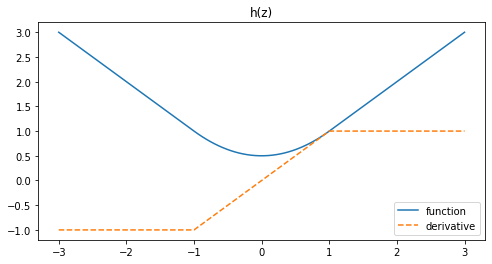

In [0]:
# Determine the values of a and c.
# Using matplotlib, plot ℎ(𝑧) and ℎ′(𝑧)  for  𝑧∈[−3,3].
# Selection

a = 0.5
c = 0.5
z = np.linspace(-3, 3, num=100)

h = h_of_z(z, a, c)
hprime = h_of_z_derivative(z, a, c)

fig = plt.figure(figsize=(8, 4))
plt.title("h(z)")

plt.plot(z, h, '-', label="function")
plt.plot(z, hprime, '--', label="derivative")

plt.axes()
plt.legend()

### Answer 2

Let's recall that by construction:

$$
\mathcal{L}(\mathbf{0})
+
\lambda\phi(\mathbf{0})
\geq
\mathcal{L}(\mathbf{w^{\star}})
+
\lambda\phi(\mathbf{w^{\star}})
\geq 
\lambda\phi(\mathbf{w^{\star}})
$$

When $\mathbf{w} = \mathbf{0}$:

$$
\lambda
\phi(\mathbf{0})
= 
\lambda\sum_{j=1}^d c
=
\lambda\sum_{j=1}^d \frac{1}{2}
$$

With $\mathcal{L}(\mathbf{0}) = 1$, this implies that:

$$
1 + \lambda\sum_{j=1}^d \frac{1}{2}
\geq
\lambda
\phi(\mathbf{w^{\star}})
$$

$$
\frac{1}{\lambda} + \sum_{j=1}^d \frac{1}{2}
\geq
\phi(\mathbf{w^{\star}})
=
\sum_{j=1}^d h(w_j^{\star})
$$

$$
\frac{1}{\lambda}
\geq
\sum_{j=1}^d h(w_j^{\star})
-
\sum_{j=1}^d \frac{1}{2}
$$

$$
\frac{1}{\lambda}
\geq
\sum_{j=1}^dh(w_j^{\star})-\frac{1}{2}
$$

Since ${\lambda} \geq 2$:
$$
\frac{1}{2}
\geq
\frac{1}{\lambda}
\geq
\sum_{j=1}^dh(w_j^{\star})-\frac{1}{2}
$$

For this condition to be true it implies the output of $\sum_{j=1}^dh(w_j^{\star})$ has to be $1$ at most ($\frac{1}{2} = 1 - \frac{1}{2} $), which means that the entries of $\mathbf{w}^{\star}$ have to be in the range $-1 < w_j < 1$, and thus belong only to the case where $h(z) = az^2 + c$.

Rewriting:

$$
\frac{1}{\lambda}
\geq
\sum_{j=1}^d\frac{1}{2}w_j^{\star2} + \frac{1}{2} - \frac{1}{2}
=
\sum_{j=1}^d\frac{1}{2}w_j^{\star2}
$$

Solving:

$$
\frac{2}{\lambda}
\geq
\sum_{j=1}^dw_j^{\star2}
$$

The right part of the equation already looks like $||\mathbf{w}||$. To complete it, we apply square root both sides of the equation:

$$
\sqrt{\frac{2}{\lambda}}
\geq
\sqrt{\sum_{j=1}^dw_j^{\star2}}
$$

Therefore:
$$
\sqrt{\frac{2}{\lambda}}
\geq
||\mathbf{w^{\star}}||
$$

### Answer 3

The answer of question 2 showed that the entries of $\mathbf{w}^{\star}$ have to be in the range of -1 to 1 with $\lambda \geq 2$. Therefore we can conclude that $\phi(\mathbf{w})$ will promote solutions within this range, where $h(z) = \frac{1}{2}z^2  + {\frac{1}{2}}$. Because of the quatratic term, and similar to the L2 regularization, this will favor diverse solutions that distribute risk among all entries in $\mathbf{w}$.

Doing a quick test on the dataset from slide 25 in the regularization lecture helps us understand better:

$$
X = [[0, 1], [1, 1], [-1, -1], [-1, 0]]
$$
$$
y = [-1, 1, -1, 1]
$$
$$
W = [[0.5, 0.5], [0, 1], [1, 0]]
$$

Using $\mathcal{L} = [1 - y(\mathbf{w} * \mathbf{x})]_{+}$, the losses for $W$ without regularization are:

$$
\mathcal{L}([0.5, 0.5]) = \mathcal{L}([0, 1]) = \mathcal{L}([1, 0]) = \frac{3}{4}
$$

Conversely, with regularization:
$$
\mathcal{L}([0.5, 0.5]) = \frac{3}{4} + \frac{10}{8}\lambda
$$
$$
\mathcal{L}([0, 1]) = \mathcal{L}([1, 0]) = \frac{3}{4} + \frac{12}{8}\lambda
$$

Lowest loss is achieved with $\mathbf{w} = [0.5, 0.5]$ (non-sparse).

### Answer 4

Following from question 2:

$$
\nabla \phi(\mathbf{w}) = \frac{\partial}{\partial w_j}\sum_{j=1}^{d}\frac{1}{2}w_j^2 + \frac{1}{2} = \sum_{j=1}^{d}w_j = \mathbf{w}
$$

$$
\nabla_{\mathbf{w}} \left[ \mathcal{L}(\mathbf{w}) + \lambda \phi (\mathbf{w})  \right]
= 
\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) + \lambda \mathbf{w}
=
\nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}) + 3 \mathbf{w}
$$

For SGD:
$$
\frac{1}{|S|} \sum_{i \in S} \nabla_{\mathbf{w}} \mathcal{l_i}(\mathbf{w}_t) + 3 \mathbf{w}_t
=
\mathbf{g}_t + 3 \mathbf{w}_t
$$

Update:
$$
\mathbf{w}_{t+1} \leftarrow \mathbf{w}_{t} - \eta_{t} (\mathbf{g}_t + 3 \mathbf{w}_t)
$$


However, to ensure that we operate in this range and avoid entering the second case of $h(z)$ where a L1-regularization-style gradient would apply too, we can use the projection technique and constrain the norm of $\mathbf{w}$ to fit inside of a ball when it exceeds radius $\sqrt{\frac{2}{3}}$ at each update step of the SGD.

$$
\mathbf{w}_{t+1}
=
\sqrt{\frac{2}{3}}
\frac{\mathbf{w}_{t+1}}{||\mathbf{w}_{t+1}||}
$$